In [1]:
import keras
import numpy as np
import pandas as pd
from keras.src.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

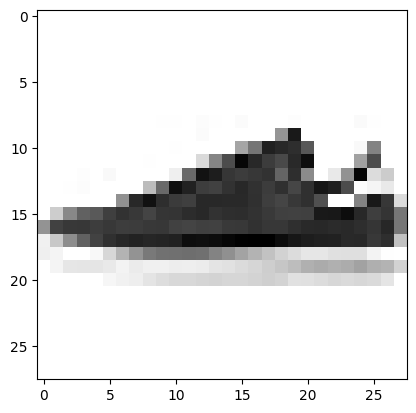

In [3]:
# plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.imshow(train_images[6], cmap=plt.cm.binary)

In [4]:
print(train_labels[6])

7


In [5]:
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

In [6]:
train_labels_one_hot[0].shape

(10,)

In [7]:
print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
#THEREFORE
print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Test images label shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Training labels shape: (60000, 10)
Test images label shape: (10000, 10)


## BASIC ANN

In [12]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ann_model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# 🎨 The Sequential Model: A Breakdown

---

## 🚀 What Is This Model?

This is a **sequential model**, which means it's a linear stack of layers where data flows in a straight line from one layer to the next. It's often used for building simple neural network architectures.

Let's break down each layer:

### 🧩 Layers Explained

#### **1. `keras.layers.Flatten(input_shape=(28, 28, 1))`**
This is the **input layer**. It takes a 2D image (28x28 pixels) and **"flattens"** it into a single 1D array of 784 pixels.
- `input_shape=(28, 28, 1)`: Specifies the dimensions of the input. The `1` indicates that the images are grayscale (one color channel).

#### **2. `keras.layers.Dense(128, activation='relu')`**
This is the **first hidden layer**. It's a fully connected layer where every neuron receives input from all the neurons in the previous layer.
- `128`: The number of neurons in this layer.
- `activation='relu'`: The **Rectified Linear Unit (ReLU)** activation function. It introduces non-linearity, helping the network learn complex patterns by turning all negative values into zero.

#### **3. `keras.layers.Dense(64, activation='relu')`**
This is the **second hidden layer**. It's another fully connected layer, but with 64 neurons. It works similarly to the first hidden layer, processing the features passed on from it.

#### **4. `keras.layers.Dense(10, activation='softmax')`**
This is the **output layer**.
- `10`: The number of neurons, which matches the number of classes you're trying to predict (e.g., the 10 classes in Fashion MNIST).
- `activation='softmax'`: This activation function converts the raw output values into a **probability distribution**. The result is 10 values, where each value is the probability that the input belongs to a specific class. The sum of all these probabilities will equal `1`.

# 🖼️ Understanding Image Dimensions & Model Complexity

---

## 📐 Why `(28, 28, 1)`?

The **`(28, 28, 1)`** in your **`Flatten`** layer's **`input_shape`** refers to the dimensions of each input image.

- **`28`**: This is the **height** of the image in pixels.
- **`28`**: This is the **width** of the image in pixels.
- **`1`**: This is the number of **color channels**. Since the Fashion MNIST images are grayscale (black and white), they only have one channel. For a color image (like a regular photograph), this would typically be **`3`** for Red, Green, and Blue (**RGB**) channels.

Even though your **`train_images`** array might look like it has a shape of `(60000, 28, 28)`, Keras expects the channel dimension to be explicitly stated for certain layers, especially when the data is being preprocessed. The **`Flatten`** layer takes this **`(28, 28, 1)`** input and converts it into a single, flat array of **784** numbers (`28 * 28 * 1`).

---

## 📉 Can I Decrease the Hidden Layers?

Yes, you can absolutely decrease the number of hidden layers or the number of neurons within them. This process is known as **hyperparameter tuning**, and it's a core part of building neural networks.

- **Fewer Layers/Neurons**: A simpler model with fewer layers will have fewer parameters to learn. This can make the model **faster to train** and **less prone to overfitting** (when the model learns the training data too well and performs poorly on new data). However, a model that is too simple might not be powerful enough to capture the complexity of the data, leading to **underfitting** and poor performance.

- **More Layers/Neurons**: A more complex model can learn more intricate patterns. This can potentially lead to **higher accuracy**, but it also increases the risk of overfitting and requires more computational resources and time to train.

You can try modifying your model to be simpler, like this:

```python
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 🧠 Key Components of a Neural Network

---

## 🎯 Softmax (Activation Function)

### **What is it?**
**Softmax** is a special activation function used in the **final layer** of a neural network for multi-class classification problems. It takes the raw outputs (called **logits**) from the last layer and converts them into a set of **probabilities**.

### **Role and Importance**
Its main job is to ensure that the model's output is a **probability distribution**. The probabilities for all possible classes add up to **1**, and the highest probability corresponds to the class that the model believes is the most likely prediction. This makes the output easily interpretable. For example, the model might output `[0.05, 0.05, 0.85, 0.05, ...]` which clearly indicates an **85% probability** that the input belongs to the third class.

### **Other Examples**
If you were doing a **binary classification** (e.g., is this a cat or not a cat?), you would typically use a **sigmoid** activation function in the output layer. A sigmoid function outputs a single value between **0** and **1**, representing the probability of the positive class.

---

## 📉 Loss (Loss Function)

### **What is it?**
The **loss function**, also known as the cost function, is a measure of how well your model's predictions align with the actual, correct labels. It calculates the **"penalty"** for every incorrect prediction. A higher loss value means the model is performing poorly, while a lower loss value indicates good performance.

### **Role and Importance**
The loss function is the target that the model tries to **minimize** during training. It provides the feedback signal that the optimizer uses to adjust the model's weights. Without a loss function, the model would have no way of knowing if it's getting better or worse.

### **Other Examples and Their Impacts**
- **`categorical_crossentropy`**: This is the most common loss function for **multi-class classification** problems, especially when your labels are **one-hot encoded**.
- **`sparse_categorical_crossentropy`**: This is an alternative that works directly with **integer labels** (e.g., `0, 1, 2`) instead of one-hot encoded labels, saving you a step in data preparation.
- **`binary_crossentropy`**: This is used for **binary classification** problems and is typically paired with the sigmoid activation function.

---

## ⚙️ Optimizer (Optimization Algorithm)

### **What is it?**
An **optimizer** is the algorithm that adjusts the weights of your neural network during the training process to minimize the loss function. Think of it as the **"engine"** of the learning process.

### **Role and Importance**
The optimizer's job is to figure out how to best update the model's internal parameters (weights and biases) to make the model's predictions more accurate. It analyzes the loss value and intelligently decides the size and direction of the adjustments.

### **Other Examples and Their Impacts**
- **`adam`**: You're using **`adam`**, which is one of the most popular and generally effective optimizers. It adapts the learning rate for each weight, making it highly efficient.
- **`sgd`**: **Stochastic Gradient Descent** is a foundational optimizer. It's simpler and can be slower to train, but it can sometimes find a better solution if carefully tuned.
- **`rmsprop`**: This is another effective optimizer that adjusts the learning rate for each parameter and is often a strong alternative to **`adam`**.

The choice of optimizer can significantly impact how quickly your model learns and the final accuracy it achieves. For most problems, **`adam`** is a great starting point, but trying others can sometimes yield a slight performance boost.

In [10]:
ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels_one_hot)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7428 - loss: 3.5095 - val_accuracy: 0.7697 - val_loss: 1.1360
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.7845 - val_accuracy: 0.7851 - val_loss: 0.7623
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.5627 - val_accuracy: 0.8173 - val_loss: 0.5846
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.4812 - val_accuracy: 0.8258 - val_loss: 0.5190
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.4332 - val_accuracy: 0.8386 - val_loss: 0.4814
